In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

#### Mnist fashion

In [3]:
fashion_item = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shift",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

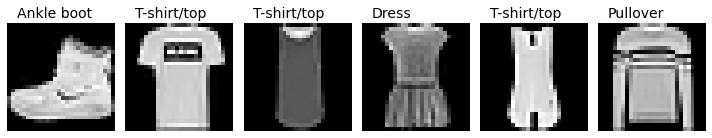

In [5]:
plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(1,6,i+1)
    img = x_train[i]
    plt.imshow(img, cmap='gray')
    item = y_train[i]
    plt.axis('off')
    plt.text(2, -2, fashion_item[item], fontsize=14)
    plt.tight_layout()

plt.show()

In [6]:
# 데이터 normalization
normal_x_train = x_train / 255.0 * 0.99 + 0.01
normal_x_test = x_test / 255.0 * 0.99 + 0.01

# t data는 sparse categorical cross entropy 를 사용하기에 rescaling X.

In [7]:
fashion_mnist_model = Sequential([
    Flatten(input_shape=(normal_x_train.shape[1], normal_x_train.shape[2]), name = "Input_layer"),
    Dense(100, activation="relu", name="Hidden_layer"),
    Dense(10, activation="softmax", name="Output_layer"),
])

In [8]:
fashion_mnist_model.compile(optimizer=Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
fashion_mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 100)               78500     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = fashion_mnist_model.fit(normal_x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5242 - accuracy: 0.8161 - val_loss: 0.4578 - val_accuracy: 0.8307
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3903 - accuracy: 0.8594 - val_loss: 0.4014 - val_accuracy: 0.8564
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.8709 - val_loss: 0.3725 - val_accuracy: 0.8675
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3270 - accuracy: 0.8810 - val_loss: 0.3581 - val_accuracy: 0.8712
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3079 - accuracy: 0.8869 - val_loss: 0.3431 - val_accuracy: 0.8760
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2935 - accuracy: 0.8905 - val_loss: 0.3430 - val_accuracy: 0.8744
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2807 - accuracy: 0.8958 - val_loss: 0.3232 - val_accuracy:

In [11]:
fashion_mnist_model.evaluate(normal_x_test, y_test)

313/313 [==============================] - 0s 963us/step - loss: 0.4170 - accuracy: 0.8799


[0.4169539511203766, 0.8798999786376953]

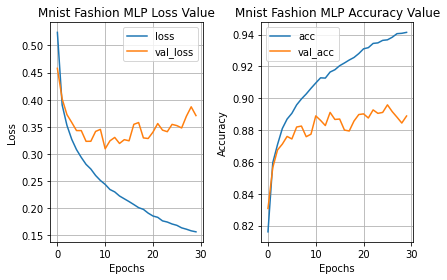

In [12]:
plt.subplot(1,2,1)

plt.title("Mnist Fashion MLP Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

plt.legend(loc='best')

plt.subplot(1,2,2)

plt.title("Mnist Fashion MLP Accuracy Value")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(hist.history["accuracy"], label="acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")

plt.legend(loc='best')

plt.tight_layout()

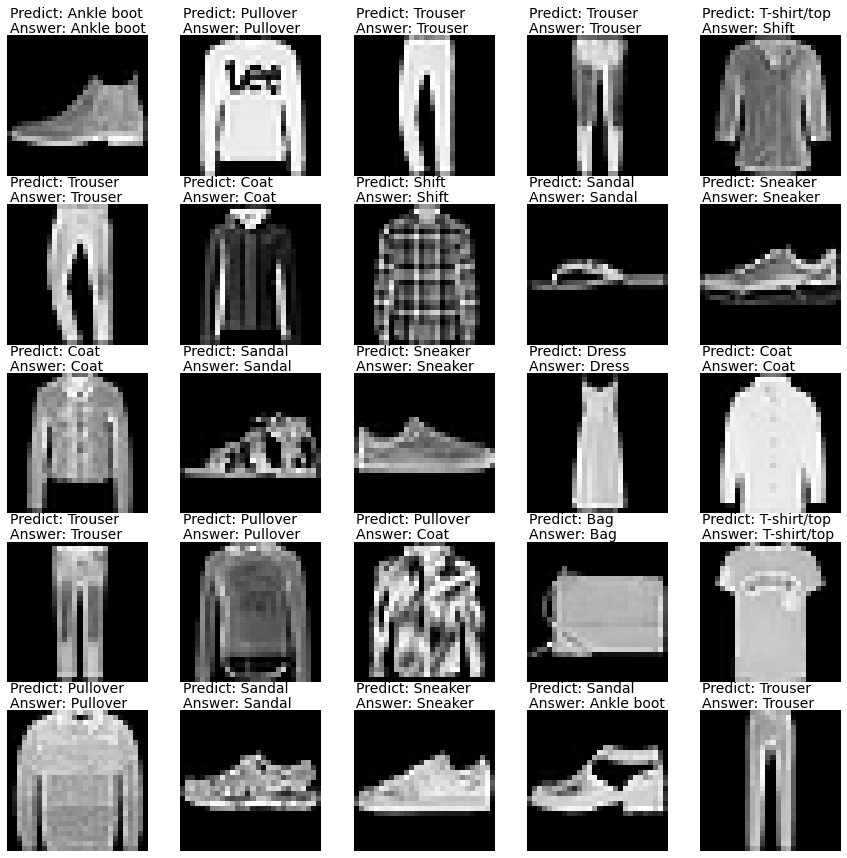

In [13]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    img = x_test[i]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    item_idx = np.argmax(fashion_mnist_model.predict(np.array([normal_x_test[i]])))
    
    predict = fashion_item[item_idx]
    answer = fashion_item[y_test[i]]
    
    plt.text(0, -4, "Predict: %s" % (predict), fontsize=14)
    plt.text(0, -1, "Answer: %s" % (answer), fontsize=14)

plt.show()